<a href="https://colab.research.google.com/github/pymoux/wildfires_DST/blob/Joan/Exploration_du_jeu_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

%matplotlib inline

# **Import data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read  CSV

fichier = "/content/drive/MyDrive/DST_PROJET_FEU DE FORET/wildfires15_db.csv"

df = pd.read_csv(fichier)
df.head()

<ipython-input-4-0c254a0de59b>:5: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fichier)


,Unnamed: 0,FOD_ID,FPA_ID,FIRE_YEAR,DISCO_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_DURATION,...,COUNTY,FIPS_CODE,FIPS_NAME,GEOID,STATEFP,COUNTYFP,COUNTYNAME,STUSPS,STATENAME,GACC_area
0,0,1,FS-1418826,2005,2005-02-02,9.0,Miscellaneous,0.10,A,0.0,...,63.0,63.0,Plumas,6063.0,6.0,63.0,Plumas,CA,California,Northern California
1,1,2,FS-1418827,2004,2004-05-12,1.0,Lightning,0.25,A,0.0,...,61.0,61.0,Placer,6017.0,6.0,17.0,El Dorado,CA,California,Northern California
2,2,3,FS-1418835,2004,2004-05-31,5.0,Debris Burning,0.10,A,0.0,...,17.0,17.0,El Dorado,6017.0,6.0,17.0,El Dorado,CA,California,Northern California
3,3,4,FS-1418845,2004,2004-06-28,1.0,Lightning,0.10,A,5.0,...,3.0,3.0,Alpine,6003.0,6.0,3.0,Alpine,CA,California,Northern California
4,4,5,FS-1418847,2004,2004-06-28,1.0,Lightning,0.10,A,5.0,...,3.0,3.0,Alpine,6003.0,6.0,3.0,Alpine,CA,California,Northern California


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'FOD_ID', 'FPA_ID', 'FIRE_YEAR', 'DISCO_DATE',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'FIRE_DURATION', 'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'GEOID', 'STATEFP', 'COUNTYFP', 'COUNTYNAME',
       'STUSPS', 'STATENAME', 'GACC_area'],
      dtype='object')


# Représentation graphique


In [ ]:
df['DISCO_DATE'] = pd.to_datetime(df['DISCO_DATE'])

# Créer une colonne 'MONTH'
df['MONTH'] = df['DISCO_DATE'].dt.month

# Calculer la distribution des incendies par année
fire_year_counts = df['FIRE_YEAR'].value_counts().sort_index()

# Créer un DataFrame pour Plotly
data = {'Year': fire_year_counts.index, 'Fires': fire_year_counts.values}
df_plotly = pd.DataFrame(data)

# Tracer le graphique avec Plotly
fig = px.bar(df_plotly, x='Year', y='Fires',
             labels={'Fires': 'Nombre de feux'})

# Ajouter une ligne de régression linéaire
m, b = np.polyfit(df_plotly['Year'], df_plotly['Fires'], 1)
fig.add_scatter(x=df_plotly['Year'], y=m*df_plotly['Year'] + b, mode='lines', name='Régression linéaire',
                line=dict(color='red', dash='dash'))

# Utiliser une couleur unique pour toutes les barres (couleur évoquant la nature et le feu)
custom_color = '#FF8C00'  # Un ton de beige pour le feu

# Mettre à jour les couleurs de la barre
fig.update_traces(marker_color=custom_color)

# Mettre en forme le titre en gras et le centrer
fig.update_layout(title={'text': '<b>Distribution des feux de forêt au fil des ans</b>', 'font': {'size': 20}, 'x':0.5, 'xanchor': 'center'})

# Afficher le graphique
fig.show()

In [ ]:
# Création du dataframe pour le boxplot
df_boxplot = df.groupby(['FIRE_YEAR', 'MONTH']).size().unstack(fill_value=0)

# Tracer le boxplot avec Plotly
fig = px.box(df_boxplot, color_discrete_sequence=['#FF8C00'])
fig.update_traces(boxmean='sd')

# Centrer le titre en gras
fig.update_layout(title='<b>Nombre d\'incendies par mois au fil des ans</b>', title_x=0.5)

# Ajouter les étiquettes sur l'axe des x pour les mois
fig.update_xaxes(title='Mois', tickvals=list(range(1, 13)), ticktext=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])

# Afficher le graphique
fig.show()

In [ ]:
# Extraire le jour de la semaine (0 pour lundi, 1 pour mardi, ..., 6 pour dimanche)
df['DAY_OF_WEEK'] = df['DISCO_DATE'].dt.dayofweek

# Création du dataframe pour le boxplot
df_boxplot2 = df.groupby(['FIRE_YEAR', 'DAY_OF_WEEK']).size().unstack(fill_value=0)

# Tracer le boxplot avec Plotly
fig = px.box(df_boxplot2, color_discrete_sequence=['#FF8C00'])
fig.update_traces(boxmean='sd')

# Centrer le titre en gras
fig.update_layout(title='<b>Nombre d\'incendies par jour de la semaine au fil des ans</b>', title_x=0.5)

# Ajouter les étiquettes sur l'axe des x pour les jours de la semaine
fig.update_xaxes(title='Jour', tickvals=list(range(7)), ticktext=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'])

# Afficher le graphique
fig.show()

In [ ]:
# Extraire le jour de la semaine (0 pour lundi, 1 pour mardi, ..., 6 pour dimanche)
df['DAY_OF_WEEK'] = df['DISCO_DATE'].dt.dayofweek

# Calculez la distribution des incendies par jour de la semaine
dow = df['DAY_OF_WEEK'].value_counts().sort_index()

# Créez un graphique avec Plotly
fig = px.bar(x=dow.index, y=dow.values, labels={'x': 'Jour de la semaine', 'y': "Nombre d'incendies"},
             title='<b>Distribution des incendies par jour de la semaine</b>')

# Ajoutez des étiquettes personnalisées pour les jours de la semaine
fig.update_xaxes(tickvals=list(range(7)), ticktext=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'])

# Mettre en gras et centrer le titre
fig.update_layout(title={'text': '<b>Distribution des incendies par jour de la semaine</b>', 'x': 0.5})

# Changer la couleur des barres
fig.update_traces(marker_color='#FF8C00')

# Affichez le graphique
fig.show()

In [ ]:
# Groupement des données par année et somme de la surface brûlée
df_surf_year = df.groupby(by='FIRE_YEAR', as_index=False).agg({'FIRE_SIZE':'sum'})

# Tracé du graphique avec Plotly
fig = px.line(df_surf_year, x='FIRE_YEAR', y='FIRE_SIZE', labels={'FIRE_SIZE': 'Surface brûlée cumulée', 'FIRE_YEAR': 'Année'},
              title='Surface brûlée cumulée par année')

# Personnalisation de la couleur
fig.update_traces(line_color='#FF8C00')

# Centrer le titre en gras
fig.update_layout(title='<b>Surface brûlée cumulée par année</b>', title_x=0.5)

# Affichage du graphique
fig.show()

In [ ]:
# Groupement des données par année et calcul de la taille moyenne des feux
df_surf_year_avg = df.groupby(by='FIRE_YEAR', as_index=False).agg({'FIRE_SIZE':'mean'})

# Tracé du graphique avec Plotly
fig_avg = px.line(df_surf_year_avg, x='FIRE_YEAR', y='FIRE_SIZE', labels={'FIRE_SIZE': 'Taille moyenne des feux', 'FIRE_YEAR': 'Année'},
              title='Taille moyenne des feux par année')

# Personnalisation de la couleur
fig_avg.update_traces(line_color='#FF8C00')

# Centrer le titre en gras
fig_avg.update_layout(title='<b>Taille moyenne des feux par année</b>', title_x=0.5)

# Affichage du graphique
fig_avg.show()

In [ ]:
import plotly.graph_objects as go

# Calcul des données
x = list(range(len(df['FIRE_SIZE_CLASS'].unique())))
h = df['FIRE_SIZE_CLASS'].value_counts(sort=False).sort_index().to_list()
xlabels = ['A (<0.25)', 'B (0.26-9.9)', 'C (10-99.9)', 'D (100-299)', 'E (300-999)', 'F (1000-4999)', 'G (>5000)']

# Création du graphique avec Plotly
fig = go.Figure()

# Ajout des barres
fig.add_trace(go.Bar(x=x, y=h, marker_color='orange'))

# Personnalisation de l'axe x
fig.update_xaxes(tickvals=x, ticktext=xlabels, tickangle=-30)

# Personnalisation du titre
fig.update_layout(title='Nombre d\'incendies par classe de taille')

# Personnalisation du titre centré en gras
fig.update_layout(title='<b>Nombre d\'incendies par classe de taille</b>', title_x=0.5)

# Affichage du graphique
fig.show()

In [ ]:
# Compter le nombre de feux par état
count_by_state = df.groupby('STATENAME').size()

# Trier par ordre décroissant
count_by_state_sorted = count_by_state.sort_values(ascending=False)

# Création du graphique avec Plotly
fig = go.Figure()

# Ajout des barres avec la couleur spécifique
fig.add_trace(go.Bar(x=count_by_state_sorted.index, y=count_by_state_sorted.values, marker_color='#FF8C00'))

# Personnalisation de l'axe x et de l'axe y
fig.update_xaxes(title='Etat')
fig.update_yaxes(title='Nombre de feux')

# Personnalisation du titre
fig.update_layout(title='<b>Nombre de feux par état</b>', title_x=0.5)

# Affichage du graphique
fig.show()

In [ ]:
# Compter le nombre de feux par région GACC
count_by_gacc = df.groupby('GACC_area').size()

# Trier par ordre décroissant
count_by_gacc_sorted = count_by_gacc.sort_values(ascending=False)

# Création du graphique avec Plotly
fig = go.Figure()

# Ajout des barres avec la couleur spécifique
fig.add_trace(go.Bar(x=count_by_gacc_sorted.index, y=count_by_gacc_sorted.values, marker_color='#FF8C00'))

# Personnalisation de l'axe x et de l'axe y
fig.update_xaxes(title='Région GACC')
fig.update_yaxes(title='Nombre de feux')

# Personnalisation du titre centré en gras
fig.update_layout(title='<b>Nombre de feux par région GACC</b>', title_x=0.5)

# Affichage du graphique
fig.show()

In [ ]:
# Calcul de la surface totale brûlée par région
total_burned_by_state = df.groupby('GACC_area')['FIRE_SIZE'].sum()

# Trier par ordre décroissant
total_burned_by_state_sorted = total_burned_by_state.sort_values(ascending=False)

# Création du graphique avec Plotly
fig = go.Figure()

# Ajout des barres
fig.add_trace(go.Bar(x=total_burned_by_state_sorted.index,
                     y=total_burned_by_state_sorted.values,
                     marker_color='orange'))

# Personnalisation de l'axe x et de l'axe y
fig.update_xaxes(title='État')
fig.update_yaxes(title='Surface brûlée (en acres)')

# Personnalisation du titre
fig.update_layout(title='Surface totale brûlée par région')

fig.update_layout(title='<b>Surface totale brûlée par région</b>', title_x=0.5)

# Affichage du graphique
fig.show()

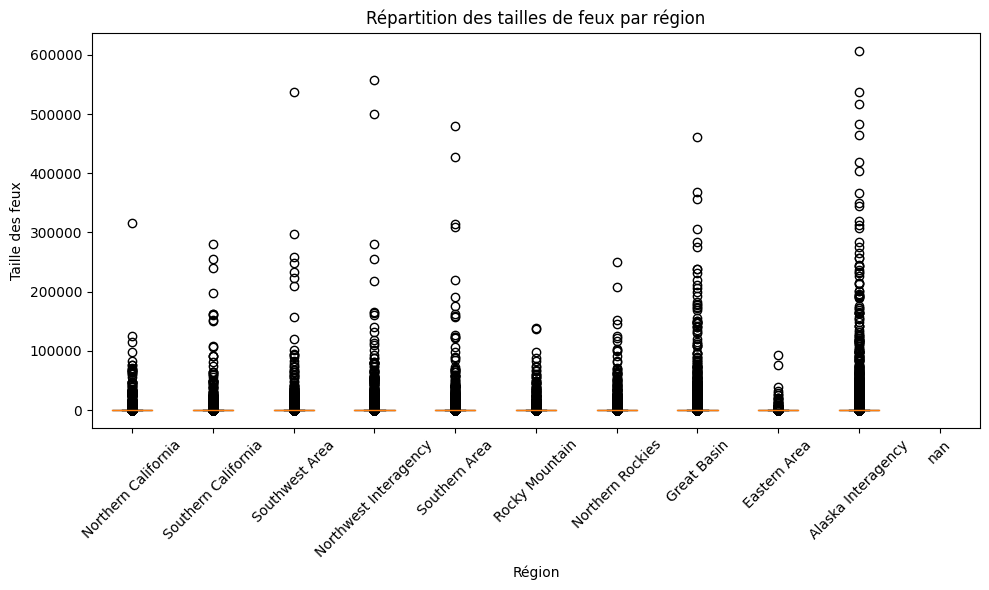

In [ ]:
# Création du boxplot avec Matplotlib
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot([df[df['GACC_area'] == region]['FIRE_SIZE'] for region in df['GACC_area'].unique()],
                      labels=df['GACC_area'].unique(), patch_artist=True)

# Personnalisation des couleurs
colors = ['#FFA500', '#FF6347', '#4682B4', '#32CD32']  # Couleurs pour chaque boîte
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Personnalisation des axes et du titre
plt.xlabel('Région')
plt.ylabel('Taille des feux')
plt.title('Répartition des tailles de feux par région')

# Affichage du graphique
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

In [ ]:
# Calcul du nombre d'incendies par cause
fires_by_cause = df['STAT_CAUSE_DESCR'].value_counts()

# Création du graphique avec Plotly en utilisant la palette Turbo
fig = px.bar(x=fires_by_cause.values, y=fires_by_cause.index, orientation='h',
             labels={'x':'Nombre d\'incendies', 'y':'Cause'},
             title='Répartition des incendies par cause',
             color=fires_by_cause.values,
             color_continuous_scale='turbo')

# Mise à jour de la mise en page pour centrer et mettre en gras le titre
fig.update_layout(title={'text': '<b>Répartition des incendies par cause</b>', 'x':0.5, 'font_size': 20})

# Affichage du graphique
fig.show()

In [ ]:
#Calcul du nombre d'incendies par cause
fire_cause = df['STAT_CAUSE_DESCR'].value_counts()

# Filtre des sources d'allumage
human_induced = ['Equipment Use', 'Smoking', 'Campfire', 'Debris Burning', 'Railroad', 'Arson', 'Children', 'Fireworks', 'Powerline', 'Structure', 'Miscellaneous']
natural_cause = ['Lightning']

# Calcul du pourcentage des sources d'allumage
human_fire = (fire_cause.loc[human_induced].sum() / df.shape[0]) * 100
natural_fire = (fire_cause.loc[natural_cause].sum() / df.shape[0]) * 100

# Création du graphique avec Plotly
fig = go.Figure()

# Ajout des barres
fig.add_trace(go.Bar(x=['Human-induced', 'Natural cause'], y=[human_fire, natural_fire],
                     marker_color=['#aa5042', '#d8bd8a']))

# Personnalisation de l'axe y
fig.update_yaxes(range=[0, 100], title='Pourcentage des incendies')

# Personnalisation du titre
fig.update_layout(title='Répartition des incendies par sources d\'allumage', title_x=0.5)

# Affichage du graphique
fig.show()

In [ ]:
# Calcul de la taille moyenne des incendies par cause
size_cause = df.groupby('STAT_CAUSE_DESCR')['FIRE_SIZE'].mean().sort_values()

# Création du graphique avec Plotly en utilisant la palette Turbo
fig = px.bar(x=size_cause.values, y=size_cause.index, orientation='h',
             labels={'x':'Taille moyenne des incendies (acres)', 'y':'Cause'},
             title='Taille moyenne des incendies par cause',
             color=size_cause.values,
             color_continuous_scale='turbo')

# Mise à jour de la mise en page pour centrer et mettre en gras le titre
fig.update_layout(title={'text': '<b>Taille moyenne des incendies par cause</b>', 'x':0.5, 'font_size': 20})

# Affichage du graphique
fig.show()

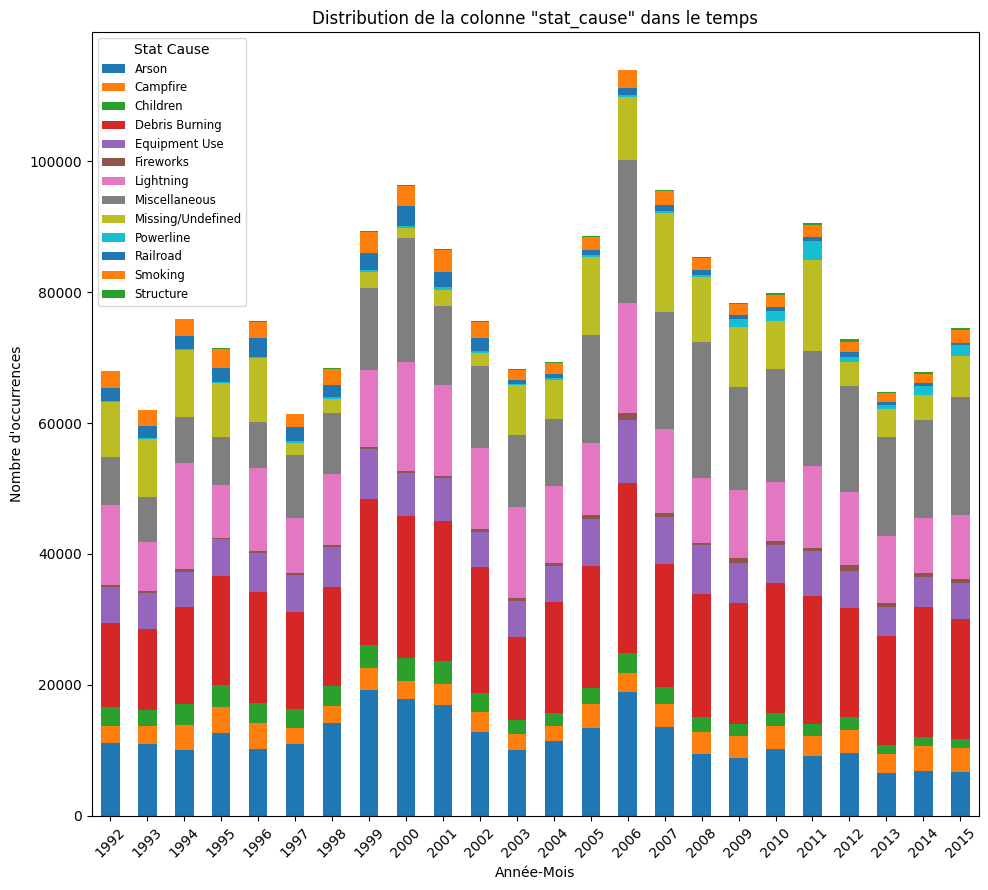

In [ ]:
distribution = df.groupby(['FIRE_YEAR', 'STAT_CAUSE_DESCR']).size().unstack(fill_value=0)
distribution.plot(kind='bar', stacked=True, figsize=(10, 9))
plt.title('Distribution de la colonne "stat_cause" dans le temps')
plt.xlabel('Année-Mois')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.legend(title='Stat Cause', loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
# Test ANOVA ('MONTH' <-> Number of fires)
import statsmodels.api
result = statsmodels.formula.api.ols(formula='FOD_ID ~ MONTH', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)


,df,sum_sq,mean_sq,F,PR(>F)
MONTH,1.0,8.920727e+18,8.920727e+18,871.508747,1.696398e-191
Residual,1880463.0,1.924834e+22,1.023596e+16,NaN,NaN


In [ ]:
result = statsmodels.formula.api.ols(formula='FIRE_SIZE  ~ MONTH', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
MONTH,1.0,3.804875e+08,3.804875e+08,60.997095,5.718829e-15
Residual,1880463.0,1.172995e+13,6.237798e+06,NaN,NaN


In [ ]:
result = statsmodels.formula.api.ols(formula='FIRE_SIZE  ~ STAT_CAUSE_DESCR', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
STAT_CAUSE_DESCR,12.0,1.896352e+10,1.580293e+09,253.74202,0.0
Residual,1880452.0,1.171136e+13,6.227952e+06,NaN,NaN


In [ ]:
result = statsmodels.formula.api.ols(formula='FIRE_SIZE  ~ GACC_area', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
GACC_area,9.0,8.587081e+10,9.541201e+09,1540.786968,0.0
Residual,1880437.0,1.164446e+13,6.192421e+06,NaN,NaN
